##  Análise   Regressivo Simbólica da Solução do Poço quadrado de Potencial Infinito 

## Pela via Clássica 

In [75]:
#Bibliotecas Gerais
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh 

In [76]:
#Constantes físicas
hbar = 1.,0   #Constante de Planck reduzida
m = 1.0       #Massa da partícula
#Parâmetros do poitencial infinito
a=1.0         #Largura do poço
V0 = 10.0     #Profundidade do poço

In [77]:
#Função que calcula o potencial
def potencial(x):
    potencial = np.zeros_like(x)
    potencial[(x< -a/2) | (x>a/2)] = V0
    return potencial
#Função para, numericamente resolver a eqS
def solve_schrodinger(N,L,V_func):
    """
    N - quantidade de acrescimos em x
    L - largura do potencial
    V_f - função Potencial
    """
     #1. Definir grade e potencial
    x = np.linspace(-L/2, L/2, N)
    dx = x[1] - x[0]
    V = V_func(x)
    #2. Construir a matriz hamiltoniana
    #Termo cinético
    main_diag = 1/(m*dx**2) * np.ones(N)
    off_diag = -1/(2*m*dx**2) * np.ones(N-1)
    H = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
    #Termo potencial
    H += np.diag(V)
    #3. Diagonalizar a matriz hamiltoniana
    energia, psi = eigh(H)  # diagonaliza a matriz e calcula autovalores (energia) e autovetores (psi)
    #Normalizar as funções de onda
    for i in range(psi.shape[1]):
        psi[:,i] /= np.sqrt(np.sum(psi[:,i]**2) * dx) 
    return x, energia, psi    



In [78]:
# Parâmetros da simulação
N = 400  # Número de pontos na grade
L = 10.0 # Comprimento da caixa

# Resolver a equação de Schrödinger
x, energia, psi = solve_schrodinger(N, L, potencial)
y=psi

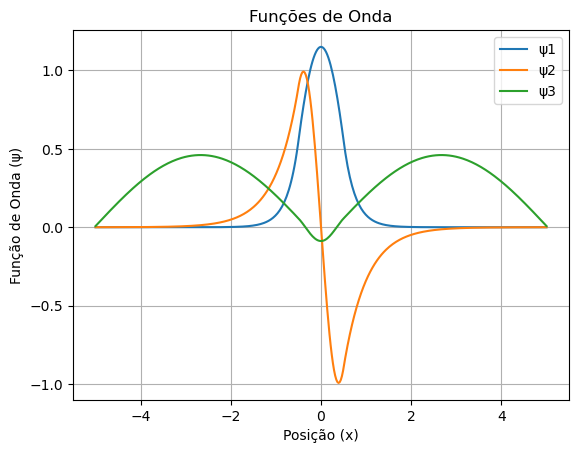

In [79]:
for i in range(min(3, psi.shape[1])):  # Plota até o número de funções de onda encontradas
    plt.plot(x, psi[:, i], label=f"ψ{i+1}")
    plt.title("Funções de Onda")
    plt.xlabel("Posição (x)")
    plt.ylabel("Função de Onda (ψ)")
    plt.legend()
    plt.grid(True)

In [80]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils.random import check_random_state
import graphviz

## Método de divisão dos dados, em subgrupos de treinamento e teste.

In [81]:
# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Bibioteca PYSR

In [82]:
import pysr

In [83]:
equations = pysr.PySRRegressor(
    niterations=30,
    binary_operators=["+", "*"],  # operators that can combine two terms
    unary_operators=["sin"],  # operators that modify a single term
)
equations.fit(X_train.reshape(-1,1), y_train[:, i])

C:\Users\USER\anaconda3\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.691e-02  0.000e+00  y = 0.27111
5           2.683e-02  6.878e-04  y = (x₀ * 0.003036) + 0.27087
7           2.683e-02  1.788e-07  y = ((x₀ * -0.99696) + 0.27087) + x₀
8           6.894e-03  1.359e+00  y = (sin(x₀ + 1.5658) * -0.21051) + 0.23302
9           6.860e-03  4.989e-03  y = sin((sin(x₀ + 1.5648) * -0.21862) + 0.23792)
10          1.105e-03  1.826e+00  y = (sin((x₀ * 1.1583) + 1.5697) * -0.23555) + 0.2518
11          9.671e-04  1.331e-01  y = sin((sin((x₀ * 1.1594) + 1.5701) * -0.24718) + 0.25879...
                                      )
12          8.335e-04  1.486e-01  y = sin(sin((sin((x₀ * 1.1606) + 1.5706) * -0.25986) + 0.2...
                                      666))
13          4.528e-04  6.102e-01  y = sin((sin((x₀ * 1.1738) + 1.569) * -0.36604) + 0.84388)...
                                       + -0.46927
14   

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick         score                                           equation  \
	0         0.000000e+00                                         0.27110794   
	1         6.878464e-04                     (x0 * 0.0030360261) + 0.270874   
	2         1.863266e-07              ((x0 * -0.9969639) + 0.27087227) + x0   
	3         1.359042e+00   (sin(x0 + 1.5657538) * -0.21050572) + 0.23301826   
	4         4.988978e-03  sin((sin(x0 + 1.5648017) * -0.21862398) + 0.23...   
	5         1.825974e+00  (sin((x0 * 1.1582853) + 1.5696508) * -0.235547...   
	6         1.331332e-01  sin((sin((x0 * 1.1594176) + 1.5701232) * -0.24...   
	7         1.486181e-01  sin(sin((sin((x0 * 1.1606286) + 1.5706028) * -...   
	8         6.101942e-01  sin((sin((x0 * 1.1738478) + 1.5690471) * -0.36...   
	9         3.941638e-01  sin(sin((sin((x0 * 1.167127) + 1.5899705) * -0...   
	10        4.650137e-02  sin(sin(sin((sin((x0 * 1.1667736) + 1.5669771)...   
	11        5.221776e-02  sin(sin(sin(sin((sin((x0 * 1.1690671) + 1.5721...   
	12        4.936285e-02  (sin(((x0 + ((x0 + x0) + sin(x0))) * 0.3893332...   
	13        1.090696e-01  (sin(((((x0 + x0) + sin(sin(x0))) + x0) * 0.38...   
	14        1.138827e-01  sin((sin((((x0 + (sin(sin(x0)) + x0)) + x0) * ...   
	15        1.597369e-01  sin((sin((((x0 + sin(x0 + x0)) * 0.1416403) + ...   
	16        7.862040e-02  sin(sin((sin(x0 + (((sin(x0 + x0) + x0) * 0.14...   
	17        4.354827e-02  sin(sin(sin((sin(x0 + (((x0 + sin(x0 + x0)) * ...   
	18        1.527944e-01  sin(sin(sin((sin((sin((x0 + sin(x0 + x0)) * 0....   
	19        5.106437e-02  sin(sin(2.780395 * ((0.26735207 * sin((sin(sin...   
	20        5.975837e-02  sin(sin(sin(((sin(sin(sin((sin(x0 + x0) + x0) ...   
	21        8.924195e-01  sin(sin((-0.20658644 + (sin((1.571204 + ((x0 +...   
	22        6.863161e-02  sin(sin((sin((((x0 + x0) + ((x0 + 0.06878261) ...   
	23        1.043938e-01  sin(sin(sin((sin((((x0 + ((x0 + 0.06882941) + ...   
	24  >>>>  2.642187e-01  sin(sin(((sin(((sin(x0 + (((sin(x0) + x0) * 0....   
	
	        loss  complexity  
	0   0.026909           1  
	1   0.026835           5  
	2   0.026835           7  
	3   0.006894           8  
	4   0.006860           9  
	5   0.001105          10  
	6   0.000967          11  
	7   0.000834          12  
	8   0.000453          13  
	9   0.000305          14  
	10  0.000291          15  
	11  0.000277          16  
	12  0.000263          17  
	13  0.000236          18  
	14  0.000211          19  
	15  0.000180          20  
	16  0.000166          21  
	17  0.000159          22  
	18  0.000136          23  
	19  0.000123          25  
	20  0.000116          26  
	21  0.000048          27  
	22  0.000044          28  
	23  0.000040          29  
	24  0.000031          30  
]

In [84]:
def round_expr(expr, num_digits=4):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(Number)})

In [85]:
round_expr(equations.sympy())

-0.5471*sin(sin(0.75034*sin(1.173*x0 + 0.1728*sin(2.323*x0 + 0.3229*sin(x0)) + 1.5728) - 0.62592))

In [86]:
equations.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,0.026909,0.27110794,0.000000e+00,0.271107940000000,PySRFunction(X=>0.271107940000000)
1,5,0.026835,(x0 * 0.0030360261) + 0.270874,6.878464e-04,x0*0.0030360261 + 0.270874,PySRFunction(X=>x0*0.0030360261 + 0.270874)
2,7,0.026835,((x0 * -0.9969639) + 0.27087227) + x0,1.863266e-07,x0*(-0.9969639) + x0 + 0.27087227,PySRFunction(X=>x0*(-0.9969639) + x0 + 0.27087...
3,8,0.006894,(sin(x0 + 1.5657538) * -0.21050572) + 0.23301826,1.359042e+00,0.23301826 + sin(x0 + 1.5657538)*(-0.21050572),PySRFunction(X=>0.23301826 + sin(x0 + 1.565753...
4,9,0.006860,sin((sin(x0 + 1.5648017) * -0.21862398) + 0.23...,4.988978e-03,sin(0.23792192 + sin(x0 + 1.5648017)*(-0.21862...,PySRFunction(X=>sin(0.23792192 + sin(x0 + 1.56...
5,10,0.001105,(sin((x0 * 1.1582853) + 1.5696508) * -0.235547...,1.825974e+00,0.2518016 + sin(x0*1.1582853 + 1.5696508)*(-0....,PySRFunction(X=>0.2518016 + sin(x0*1.1582853 +...
6,11,0.000967,sin((sin((x0 * 1.1594176) + 1.5701232) * -0.24...,1.331332e-01,sin(0.25878683 + sin(x0*1.1594176 + 1.5701232)...,PySRFunction(X=>sin(0.25878683 + sin(x0*1.1594...
7,12,0.000834,sin(sin((sin((x0 * 1.1606286) + 1.5706028) * -...,1.486181e-01,sin(sin(0.2665986 + sin(x0*1.1606286 + 1.57060...,PySRFunction(X=>sin(sin(0.2665986 + sin(x0*1.1...
8,13,0.000453,sin((sin((x0 * 1.1738478) + 1.5690471) * -0.36...,6.101942e-01,sin(0.84388363 + sin(x0*1.1738478 + 1.5690471)...,PySRFunction(X=>sin(0.84388363 + sin(x0*1.1738...
9,14,0.000305,sin(sin((sin((x0 * 1.167127) + 1.5899705) * -0...,3.941638e-01,sin(sin(0.9431944 + sin(x0*1.167127 + 1.589970...,PySRFunction(X=>sin(sin(0.9431944 + sin(x0*1.1...


In [87]:
equations.equations_.loss

0     0.026909
1     0.026835
2     0.026835
3     0.006894
4     0.006860
5     0.001105
6     0.000967
7     0.000834
8     0.000453
9     0.000305
10    0.000291
11    0.000277
12    0.000263
13    0.000236
14    0.000211
15    0.000180
16    0.000166
17    0.000159
18    0.000136
19    0.000123
20    0.000116
21    0.000048
22    0.000044
23    0.000040
24    0.000031
Name: loss, dtype: float64

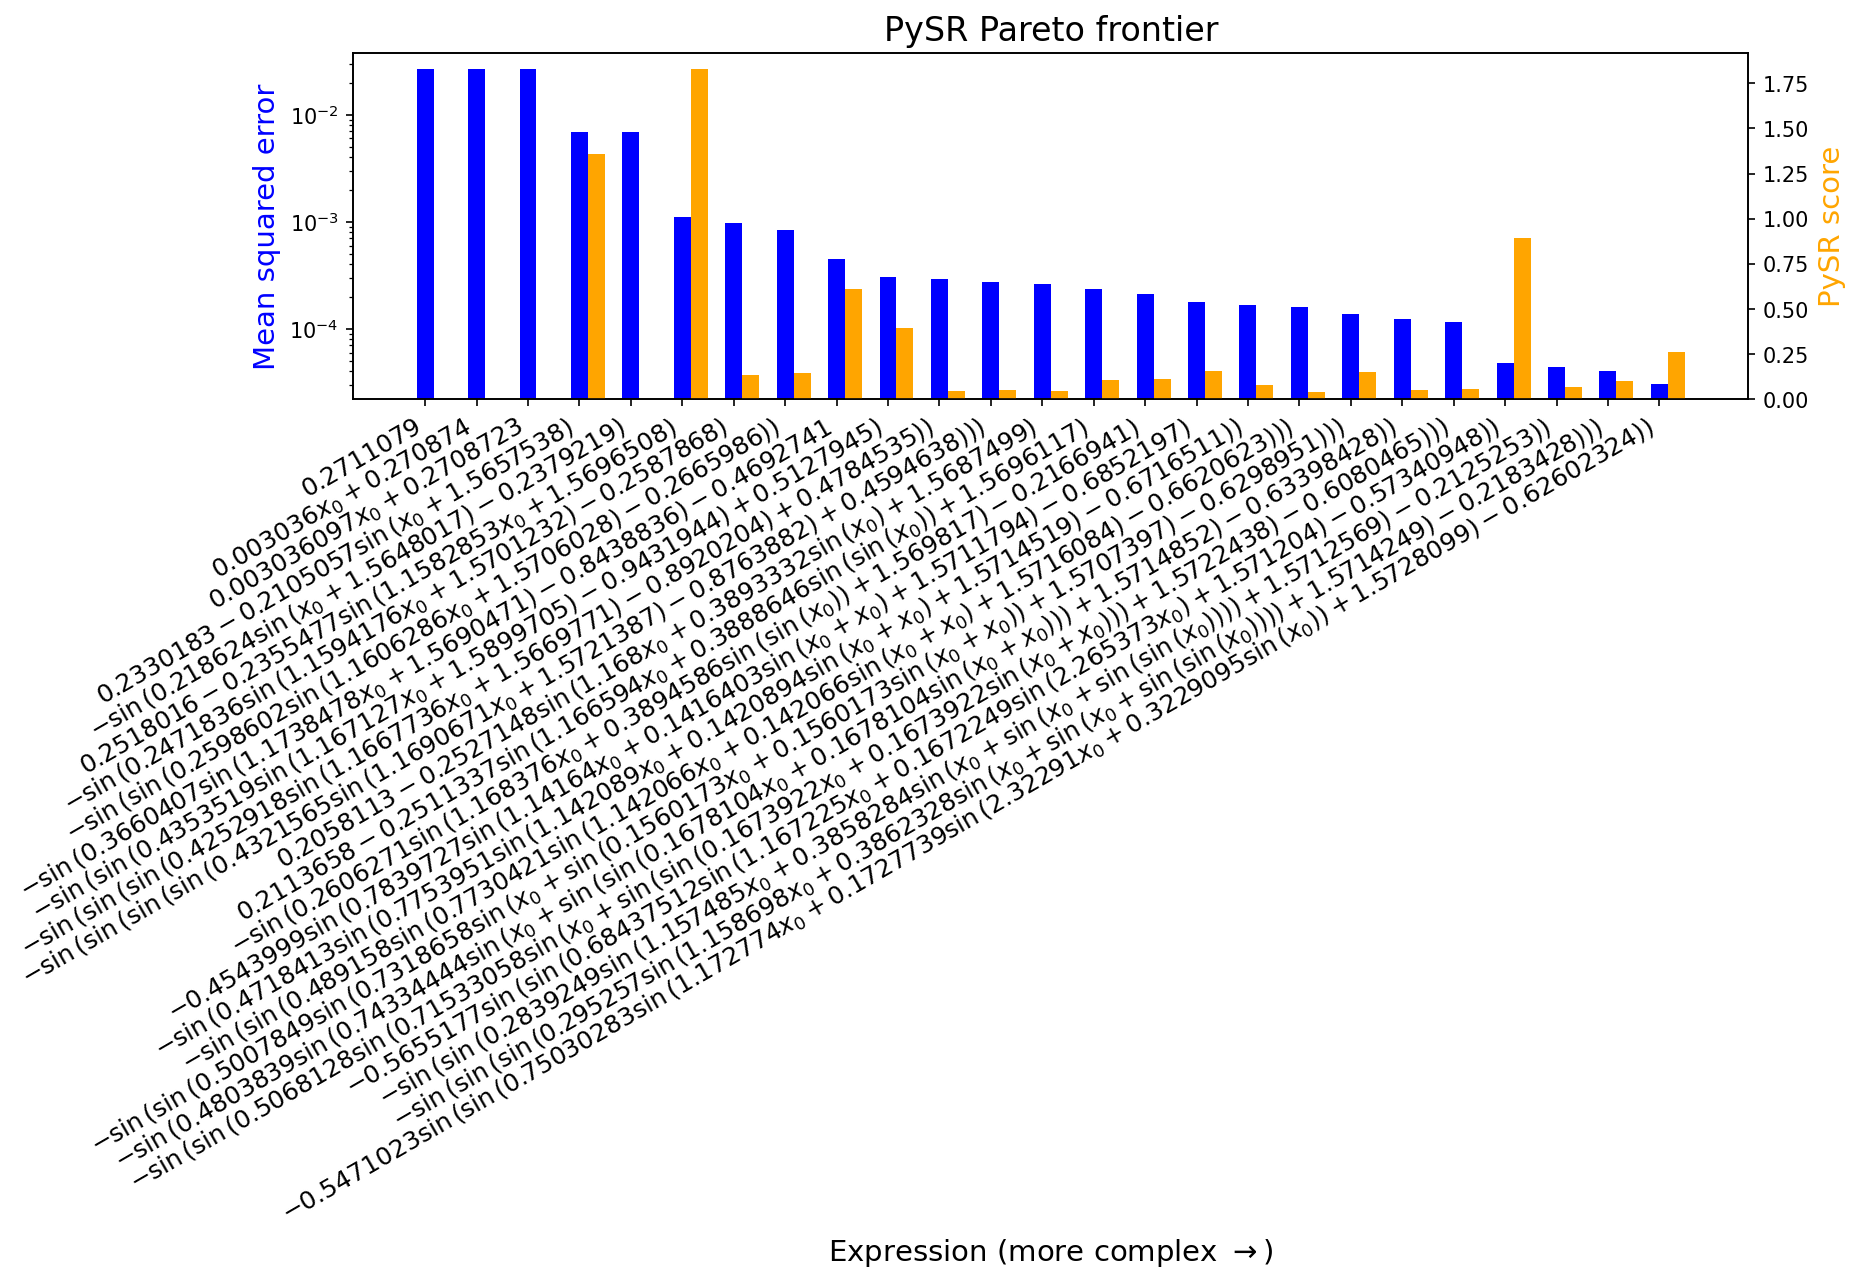

In [88]:
plt.figure(figsize=(12, 3), dpi=150)
plt.bar(
    np.arange(len(equations.equations_)),
    equations.equations_.loss,
    width=0.33,
    color="blue",
)


plt.yscale("log")
plt.ylabel("Mean squared error", fontsize=14, color="blue")
plt.xticks(
    range(len(equations.equations_)),
    [f"${latex(round_expr(v,7))}$" for v in equations.equations_.sympy_format],
    rotation=30,
    ha="right",
    fontsize=12,
)
plt.title("PySR Pareto frontier", fontsize=16)
plt.xlabel("Expression (more complex $\\to$)", fontsize=14)

ax2 = plt.twinx()
ax2.bar(
    np.arange(len(equations.equations_)) + 0.33,
    equations.equations_.score,
    width=0.33,
    color="orange",
)
ax2.set_ylabel("PySR score", color="orange", fontsize=14)

plt.show()

In [152]:
import pandas as pd

# Replace with the actual filename generated
hall_of_fame_df = pd.read_csv("outputs/20251011_203353_pbJVKX/hall_of_fame.csv")
count=0
equ=hall_of_fame_df.Equation
for i in equ:
    print("f(x0)",count,'=',i)
    print('---')
    count+=1

f(x0) 0 = 0.27110794
---
f(x0) 1 = (x0 * 0.0030360261) + 0.270874
---
f(x0) 2 = ((x0 * -0.9969639) + 0.27087227) + x0
---
f(x0) 3 = (sin(x0 + 1.5657538) * -0.21050572) + 0.23301826
---
f(x0) 4 = sin((sin(x0 + 1.5648017) * -0.21862398) + 0.23792192)
---
f(x0) 5 = (sin((x0 * 1.1582853) + 1.5696508) * -0.23554768) + 0.2518016
---
f(x0) 6 = sin((sin((x0 * 1.1594176) + 1.5701232) * -0.24718362) + 0.25878683)
---
f(x0) 7 = sin(sin((sin((x0 * 1.1606286) + 1.5706028) * -0.2598602) + 0.2665986))
---
f(x0) 8 = sin((sin((x0 * 1.1738478) + 1.5690471) * -0.3660407) + 0.84388363) + -0.4692741
---
f(x0) 9 = sin(sin((sin((x0 * 1.167127) + 1.5899705) * -0.43535188) + 0.9431944) + -0.5127945)
---
f(x0) 10 = sin(sin(sin((sin((x0 * 1.1667736) + 1.5669771) * -0.42529175) + 0.8920204) + -0.47845346))
---
f(x0) 11 = sin(sin(sin(sin((sin((x0 * 1.1690671) + 1.5721387) * -0.43215653) + 0.87638825) + -0.45946375)))
---
f(x0) 12 = (sin(((x0 + ((x0 + x0) + sin(x0))) * 0.38933322) + 1.5687499) * -0.25271475) + 0.20